# STA130 Course Project

> See [here](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) further details!!

The data we'll use for the Fall 2024 STA130 course project is based on the [Canadian Social Connection Survey](https://casch.org/cscs) (CSCS) run by [genwell](https://genwell.ca/) and the [Canadian Alliance for Social Connection and Health](https://casch.org/) (CASCH). This data is used to produce [Rapid Evidence Briefs](https://casch.org/publications) which scientifically analyze the importance of social connection and community engagement -- relationships with family, friends, coworkers, neighbours, and strangers -- for personal health and well-being. The purpose of our course project is to help raise awareness about and interest in this often under appreciated topic. To do so STA130 students will do "data blitz" to discover interesting information and identify key statistics hidden inside the CSCS data. The findings each project team produces will be shared with other UofT courses (in Digital Humanities, Writing, Sociology, etc.) and other genwell and CASCH associated teams specializing in communications and media relations, and they will transform the most interesting findings of our teams into content for social media campaigns. If our findings are important enough, they may even form the basis of future Rapid Evidence Briefs...

> In conjuction with this project, we are taking part in a reserach project "investigating the impact of community engaged learning on student happiness, satisfaction, and well-being" (alongside multiple courses in Pharmacology and Toxicology, Human Biology, and Psychology). We are curious to know if you find this project altruistic, and how this in turn might influece your own experience in the course, and beyond.

To use this data ethically, professionally, and appropriately we must take a quick look and abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf). You should also take a quick look at the [list of available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view) and then check out the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) itself (available at the bottom of the [CSCS](https://casch.org/cscs) webpage).


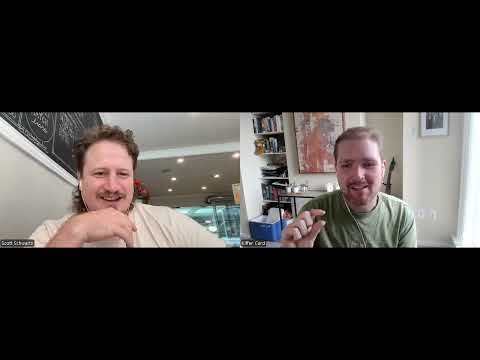

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('rmuRoAf9-bo', width=800, height=500)

In [2]:
# download these files from their original access point at the bottom of 
# the CSCS webpage (https://casch.org/cscs) or the course github and access them locally
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

import pandas as pd
cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

/var/folders/b0/20_s9xf13p33yqxth9cv22380000gn/T/ipykernel_73585/3475480029.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSCS_data_anon.csv",


(11431, 1779)

In [3]:
# This variable indicates the dataset that the observation belongs to
data.DATASET.value_counts()

DATASET
2022 Cross-Sectional    3916
2021 Cross-Sectional    3589
2023 Cross-Sectional    3058
2022 Cohort              493
2023 Cohort              375
Name: count, dtype: int64

In [4]:
# This variable indicates the year the observation was recruited
data.SURVEY_collection_year.value_counts()

SURVEY_collection_year
2022    4409
2021    3589
2023    3433
Name: count, dtype: int64

In [5]:
# This variable indicates whether the observation was part of the cohort survey or the cross-sectional survey 
data.SURVEY_collection_type.value_counts()

SURVEY_collection_type
cross     10563
cohort      868
Name: count, dtype: int64

In [6]:
# This variable indicates whether the observation is from a cohort participant
data.SURVEY_cohort_participant.value_counts()

SURVEY_cohort_participant
False    10172
True      1259
Name: count, dtype: int64

In [7]:
# This variable indicates the number of observations the participant has
data.SURVEY_num_responses.value_counts()

SURVEY_num_responses
1     9828
3      691
2      418
4      407
5       58
6       19
7        9
11       1
Name: count, dtype: int64

In [8]:
# This variable indicates the unique ID of the participant
data.SURVEY_random_id.notna().value_counts() # few have IDs

SURVEY_random_id
False    10837
True       594
Name: count, dtype: int64

In [9]:
# This variable indicates cases we recommend removing from an analysis due to fast completion times or possible fraudulent responses.
data.REMOVE_case.value_counts()

REMOVE_case
No       10018
Yes       1153
Maybe      260
Name: count, dtype: int64

In [10]:
# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape

(10018, 1779)

In [11]:
# And select out participants who are part of the cohort data 
# (but may also be a part of the cross-sectional data)
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape

(865, 1779)

In [12]:
# And remove year 2023 for which there's not yet much data collected
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape

(850, 1779)

In [13]:
# And remove columns that have less than some number of missing values
# We could consider no missing values using 850, or...?
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape

(850, 166)

In [14]:
# The data itself then looks like this
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000) 
dataV2_cohortV3

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

In [15]:
# Here's a high level summary of the data
for col in dataV2_cohortV3.columns:
    col_summary = dataV2_cohortV3[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, dataV2_cohortV3[col].shape, "\n")

UNIQUE_id (850,) 

UNIQUE_num_records
3    628
2    199
4     23
Name: count, dtype: int64 

ELIGIBLE_consent
Yes    850
Name: count, dtype: int64 

COVID_prevention_distancing
Very closely        431
Somewhat closely    303
Not at all           75
NaN                  41
Name: count, dtype: int64 

COVID_prevention_masks
Very closely        576
Somewhat closely    142
Not at all           90
NaN                  42
Name: count, dtype: int64 

COVID_prevention_hand_washing
Very closely        581
Somewhat closely    189
NaN                  41
Not at all           39
Name: count, dtype: int64 

COVID_prevention_reduce_people
Very closely        504
Somewhat closely    205
Not at all           96
NaN                  45
Name: count, dtype: int64 

COVID_prevention_avoid_trips
Very closely        410
Somewhat closely    247
Not at all          151
NaN                  42
Name: count, dtype: int64 

COVID_prevention_household
Very closely        387
Somewhat closely    260
Not at all     

In [16]:
# And here are some explanations about the columns in the data
cols_dataV2_cohortV3 = cols.new_var.apply(lambda x: x in dataV2_cohortV3.columns)
cols_dataV2_cohortV3 = cols[cols_dataV2_cohortV3].iloc[:,-2:].drop_duplicates()
for i,row in cols_dataV2_cohortV3.sort_values('new_var').iterrows():
    print("\033[1m\033[4m",row.new_var, "\033[0m", sep="", end=": ")
    print(row.text, end="\n\n")

CONNECTION_activities_board_games_p3m: In the PAST THREE MONTH, how often have you... - played a board game with others?

CONNECTION_activities_chat_p3m: In the PAST THREE MONTH, how often have you... - had an extended conversation via text or a messaging app?

CONNECTION_activities_chat_p3m: In the PAST THREE MONTH, how often have you... - had an in-person, face-to-face conversation with someone?

CONNECTION_activities_checked_in_p3m: In the PAST THREE MONTH, how often have you... - sent a text/private message to someone just to check in?

CONNECTION_activities_church_p3m: In the PAST THREE MONTH, how often have you... - attended church, synagogue, temple, etc.?

CONNECTION_activities_coffee_p3m: In the PAST THREE MONTH, how often have you... - met someone for a meal, drink, dessert, or cup of coffee?

CONNECTION_activities_community_p3m: In the PAST THREE MONTH, how often have you... - volunteered in the community?

CONNECTION_activities_computer_games_p3m: In the PAST THREE MONTH, h

In [17]:
# Some columns are not included in the "list of available variables"
# but based on the available explanations their meaning is very clear
for i,c in enumerate(dataV2_cohortV3.columns):
	if not c in cols.new_var.values:
		print(i,c)

0 UNIQUE_id
1 UNIQUE_num_records
102 SURVEY_collection_type
103 SURVEY_collection_year
104 DATASET
116 SURVEY_cohort_participant
117 SURVEY_num_responses
118 SURVEY_orphan_cohort_response
119 CONNECTION_activities_meeting_non_work_p3m
120 CONNECTION_activities_meeting_non_work_pm
121 CONNECTION_activities_church_pm
122 CONNECTION_activities_greeted_neighbour_or_stranger_p3m
123 CONNECTION_activities_greeted_neighbour_or_stranger_pm
124 CONNECTION_activities_phone_pm
125 CONNECTION_activities_group_video_chat_pm
126 CONNECTION_activities_sex_pm
127 CONNECTION_activities_helped_pm
128 CONNECTION_activities_hug_pm
129 CONNECTION_activities_kissed_pm
130 CONNECTION_activities_new_friend_pm
131 CONNECTION_activities_coffee_pm
132 CONNECTION_activities_discussion_group_pm
133 CONNECTION_activities_group_exercise_pm
134 CONNECTION_activities_checked_in_pm
135 CONNECTION_activities_visited_family_pm
136 CONNECTION_activities_visited_friends_pm
137 CONNECTION_activities_community_pm
138 CONNECT

### Now for some comparisons...

Let's see if the number of seconds it takes to answer questions on average differs between the cross-sectional and cohort versions of the studies

In [18]:
# REMINDER: our data includes participants who are part of the cohort data 
# But also includes cross-sectional data collected from them
dataV2_cohortV3.groupby('SURVEY_collection_type').size()

SURVEY_collection_type
cohort    477
cross     373
dtype: int64

In [19]:
import plotly.express as px

fig = px.box(dataV2_cohortV3[dataV2_cohortV3.Secs_per_q<30], 
             x='SURVEY_collection_type', y='Secs_per_q')
fig.update_layout(xaxis_title='SURVEY_YEAR', yaxis_title='Secs_per_q',
                  title='Boxplot of Secs_per_q by SURVEY_YEAR').show()

As seen from the code below (since "cross-sectional" is always in 2021 while "cohort" is always in 2022), it seems participants first did the cross-sectional survey and were then recruited into the cohort study the following year; so, the cohort study would have been the second time the participants completed the survey... so might we wonder if they were faster the second time around? 

In [20]:
dataV2_cohortV4 = dataV2_cohortV3[dataV2_cohortV3.Secs_per_q<30].copy()
dataV2_cohortV4.loc[:, 'SURVEY_YEAR'] = (dataV2_cohortV4.SURVEY_collection_type+" "+dataV2_cohortV4.SURVEY_collection_year.astype(str)).values
# dataV2_cohortV4.SURVEY_YEAR.value_counts()
# SURVEY_YEAR
# cohort 2022    446
# cross 2021     368

# we'll focus on some of the numeric outcomes in the data set... including Secs_per_q
dataV2_cohortV4_wide = \
dataV2_cohortV4.melt(id_vars=['UNIQUE_id','SURVEY_YEAR'], 
                     value_vars=['Secs_per_q',
                                'LONELY_ucla_loneliness_scale_score',
                                'WELLNESS_life_satisfaction', 
                                'WELLNESS_malach_pines_burnout_measure_score',
                                'LONELY_dejong_emotional_social_loneliness_scale_score',
                                'LONELY_dejong_emotional_loneliness_sub_scale_score',
                                'LONELY_dejong_social_loneliness_sub_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_family_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_friends_subscale_score',
                                'WELLNESS_subjective_happiness_scale_score',
                                'WELLNESS_phq_score', 'WELLNESS_gad_score'])
# and we'll put these in columns for "cross 2021" and "cohort 2022"
dataV2_cohortV4_wide['variable'] = dataV2_cohortV4_wide['variable'] + " ("+dataV2_cohortV4_wide['SURVEY_YEAR']+")" 
# on the basis of UNIQUE_id which links individuals across studies
dataV2_cohortV4_wide = dataV2_cohortV4_wide.pivot(index='UNIQUE_id', columns='variable', values='value')
# and consider fully observed data only
dataV2_cohortV4_wideV2 = dataV2_cohortV4_wide.dropna() 
dataV2_cohortV4_wideV2

variable,LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022),LONELY_dejong_emotional_loneliness_sub_scale_score (cross 2021),LONELY_dejong_emotional_social_loneliness_scale_score (cohort 2022),LONELY_dejong_emotional_social_loneliness_scale_score (cross 2021),LONELY_dejong_social_loneliness_sub_scale_score (cohort 2022),LONELY_dejong_social_loneliness_sub_scale_score (cross 2021),LONELY_ucla_loneliness_scale_score (cohort 2022),LONELY_ucla_loneliness_scale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_family_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_family_subscale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_scale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_scale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score (cross 2021),Secs_per_q (cohort 2022),Secs_per_q (cross 2021),WELLNESS_gad_score (cohort 2022),WELLNESS_gad_score (cross 2021),WELLNESS_life_satisfaction (cohort 2022),WELLNESS_life_satisfaction (cross 2021),WELLNESS_malach_pines_burnout_measure_score (cohort 2022),WELLNESS_malach_pines_burnout_measure_score (cross 2021),WELLNESS_phq_score (cohort 2022),WELLNESS_phq_score (cross 2021),WELLNESS_subjective_happiness_scale_score (cohort 2022),WELLNESS_subjective_happiness_scale_score (cross 2021)
UNIQUE_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cscs_00021,2.0,1.0,2.0,1.0,0.0,0.0,5.0,6.0,6.50,5.75,6.75,5.25,6.750000,6.000000,7.00,7.00,6.017964,6.018939,0.0,0.0,2.0,4.0,2.4,2.6,1.0,1.0,5.25,5.00
cscs_00080,1.0,1.0,2.0,1.0,1.0,0.0,6.0,6.0,4.00,4.50,5.00,5.25,4.916667,5.333333,5.75,6.25,7.452381,14.885794,0.0,1.0,8.0,9.0,3.2,2.4,0.0,0.0,6.00,6.00
cscs_00081,3.0,3.0,6.0,6.0,3.0,3.0,9.0,9.0,4.50,3.50,4.25,2.25,4.750000,3.750000,5.50,5.50,4.377483,5.128920,4.0,4.0,8.0,2.0,3.1,4.9,4.0,3.0,4.50,2.75
cscs_00114,1.0,1.0,3.0,3.0,2.0,2.0,8.0,6.0,6.00,5.75,5.75,5.50,5.583333,5.416667,5.00,5.00,3.690476,4.485294,0.0,6.0,5.0,6.0,4.6,3.7,2.0,0.0,4.50,4.25
cscs_00204,3.0,3.0,6.0,6.0,3.0,3.0,8.0,9.0,1.25,4.50,6.25,7.00,3.916667,5.666667,4.25,5.50,4.954248,4.451493,4.0,3.0,6.0,2.0,4.8,3.6,3.0,4.0,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cscs_11699,1.0,0.0,2.0,2.0,1.0,2.0,3.0,3.0,5.50,5.50,5.75,6.25,6.083333,6.250000,7.00,7.00,7.969512,5.714674,0.0,0.0,10.0,3.0,2.9,3.5,1.0,0.0,5.25,6.00
cscs_11724,2.0,3.0,2.0,4.0,0.0,1.0,5.0,5.0,6.25,5.00,5.00,5.00,6.083333,5.666667,7.00,7.00,6.863095,9.222642,0.0,0.0,7.0,8.0,2.1,3.3,1.0,2.0,5.25,5.25
cscs_11748,3.0,3.0,5.0,6.0,2.0,3.0,9.0,9.0,3.00,1.50,4.00,3.00,4.083333,3.166667,5.25,5.00,8.376543,7.351449,4.0,2.0,4.0,3.0,4.6,5.4,4.0,1.0,4.00,3.00


In [21]:
# This could be used for the proportion of a paired differences test...
(dataV2_cohortV4_wideV2['Secs_per_q (cohort 2022)']>
 dataV2_cohortV4_wideV2['Secs_per_q (cross 2021)']).sum(), dataV2_cohortV4_wideV2.shape[0]

(np.int64(104), 283)

In [22]:
# This could be used for the proportion for a test of "random coin flipping" 
col = 'LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022)'
(dataV2_cohortV4_wideV2[col]>1).sum(), dataV2_cohortV4_wideV2.shape[0]

(np.int64(153), 283)

In [23]:
dataV2_cohortV4_wideV2['LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022)'].value_counts()

LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022)
2.0    84
1.0    76
3.0    69
0.0    54
Name: count, dtype: int64

In [24]:
px.histogram(dataV2_cohortV4_wideV2, x='LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022)')